In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from ch_3_metrics import *

In [2]:
auto_data = pd.read_csv('../data/auto.csv')

In [3]:
auto_data['horsepower_squared'] = auto_data['horsepower'] ** 2

In [4]:
X = auto_data[['horsepower', 'horsepower_squared']].to_numpy()
y = auto_data['mpg'].to_numpy()

In [5]:
X = sm.add_constant(X)
linear_model = sm.OLS(endog=y, exog=X)
lm_results = linear_model.fit()

rse, r_squared, f_statistic = get_metrics(lm_results)
print(lm_results.summary().tables[1])
display_metrics(rse, r_squared, f_statistic)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.9001      1.800     31.604      0.000      53.360      60.440
x1            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
x2             0.0012      0.000     10.080      0.000       0.001       0.001
Residual Standard Error: 4.373921
R Squared: 0.687559
F Statistic: 428.017592



In [6]:
X_pred_min, X_pred_max = X[:, 1].min() - 10, X[:, 1].max() + 10
X_pred = np.linspace(X_pred_min, X_pred_max, 10) # horsepower
X_pred = np.column_stack((X_pred, X_pred ** 2)) # add horsepower ** 2
X_pred = sm.add_constant(X_pred)

y_pred = lm_results.predict(X_pred)

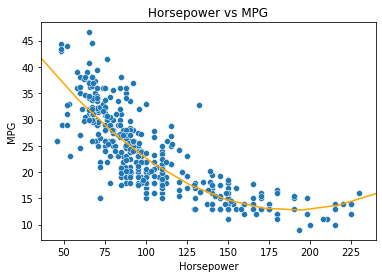

In [7]:
horsepower_plot = sns.scatterplot(
    data=auto_data,
    x='horsepower',
    y='mpg'
)
horsepower_plot.set(
    title='Horsepower vs MPG',
    xlabel='Horsepower',
    ylabel='MPG'
)
plt.plot(X_pred[:, 1], y_pred, color='orange')
plt.xlim(X_pred_min, X_pred_max)
plt.show()